## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview

study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.

len(clean_study_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = np.mean(clean_study_data["Tumor Volume (mm3)"])
median = np.median(clean_study_data["Tumor Volume (mm3)"])
variance = np.var(clean_study_data["Tumor Volume (mm3)"], ddof = 0)
sd = np.std(clean_study_data["Tumor Volume (mm3)"], ddof = 0)
sample_volume = clean_study_data.sample(75)
volume = sem(sample_volume["Tumor Volume (mm3)"])
summary_statistics = pd.DataFrame({"Mean":[mean],
                        "Median":[median],
                         "Variance":[variance],
                         "Standard Deviation":[sd],
                         "SEM":[volume],
                        })
summary_statistics.head()
# This method is the most straighforward, creating multiple series and putting them all together at the end.



,Mean,Median,Variance,Standard Deviation,SEM
0,50.435293,48.933454,79.42064,8.911826,1.107257


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = clean_study_data.groupby('Drug Regimen')
regimen_mean = regimen.mean()
regimen_median = regimen.median()
regimen_variance = regimen.var()
regimen_sd = regimen.std()
regimen_sem = regimen.sem()
summary_statistics2 = pd.DataFrame({"Mean": regimen_mean["Tumor Volume (mm3)"],
                         "Median": regimen_median["Tumor Volume (mm3)"],
                         "Variance": regimen_variance["Tumor Volume (mm3)"],
                         "Standard Deviation": regimen_sd["Tumor Volume (mm3)"],
                         "SEM": regimen_sem["Tumor Volume (mm3)"]
                        })
summary_statistics2
# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

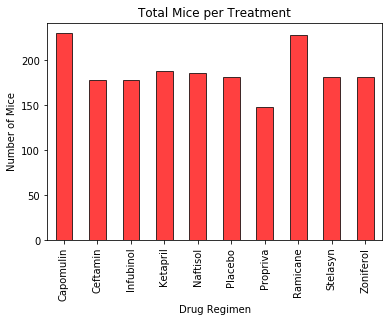

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_df = clean_study_data.groupby("Drug Regimen")
var = mice_df['Mouse ID'].count()
var.plot(kind = 'bar',color ='r',title = "Total Mice per Treatment", alpha = .75, edgecolor = 'k')
plt.ylabel('Number of Mice')
plt.show()

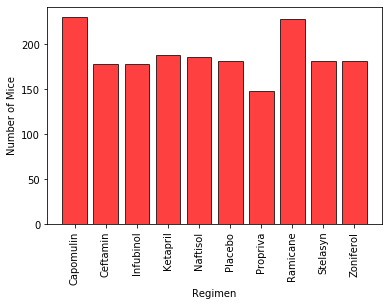

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

plt.bar(var.index,var,color='r',alpha=.75,edgecolor='k')
plt.xticks(rotation=90)
plt.ylabel('Number of Mice')
plt.xlabel('Regimen')
plt.show()

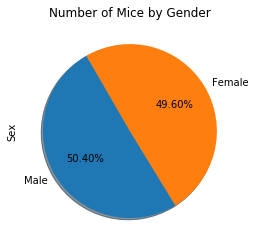

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = mouse_metadata.loc[mouse_metadata['Mouse ID'] != 'g989']
gender_plot = gender['Sex'].value_counts()
gender_plot.plot(kind='pie', shadow = True, autopct = '%1.2f%%',startangle=120)
plt.title('Number of Mice by Gender')
plt.show()

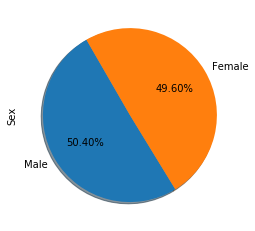

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = gender_plot.index
sizes = gender_plot
chart = plt.pie(sizes,autopct='%1.2f%%',labels=labels, shadow=True, startangle =120)
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_study_data[['Mouse ID', 'Timepoint', 'Drug Regimen']]
filtered_df=timepoint_df[timepoint_df['Drug Regimen'].isin(regimen)]
grouped_df = filtered_df.groupby('Mouse ID')['Timepoint'].max()
# merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_df,clean_study_data,on=['Mouse ID','Timepoint'],how = 'left')
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [21]:
#Put treatments into a list for a for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

#tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Locate the rows which contain mice on each drug and get the tumor volume
# add subset
# Determine outliers using upper and lower bounds




    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

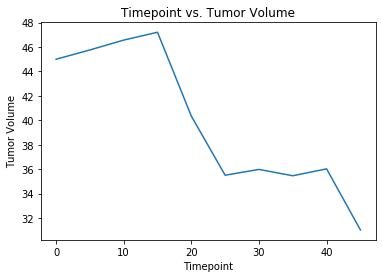

In [25]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_mouse = clean_study_data.loc[clean_study_data['Mouse ID']=='u364']
x_axis=capomulin_mouse['Timepoint']
y_axis=capomulin_mouse['Tumor Volume (mm3)']
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.title('Timepoint vs. Tumor Volume')
plt.plot(x_axis,y_axis)

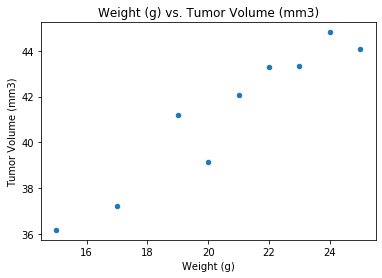

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_mouse = clean_study_data.loc[clean_study_data['Drug Regimen']=='Capomulin']
capomulin_df = capomulin_mouse.groupby('Weight (g)')
mean_tumor= capomulin_df['Tumor Volume (mm3)'].mean()
weight_tumor=pd.DataFrame(mean_tumor).reset_index()
weight_tumor.plot(kind='scatter',x='Weight (g)',y = 'Tumor Volume (mm3)')
plt.title('Weight (g) vs. Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient of weight and average tumor volume is 0.9505243961855265


Text(20, 37, 'y = 0.89x + 22.76')

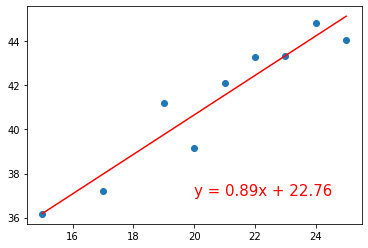

In [28]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

var1 = weight_tumor['Weight (g)']
var2 = weight_tumor['Tumor Volume (mm3)']
corr = st.pearsonr(var1,var2)
print(f"The correlation coefficient of weight and average tumor volume is {corr[0]}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(var1,var2)
regress_vals = var1*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(var1,var2)
plt.plot(var1, regress_vals,'r-')
plt.annotate(line_eq,(20,37), fontsize= 15,color ='r')